In [3]:
!pip install pandas_datareader

In [5]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 8.6 MB/s eta 0:00:000:00:01m eta 0:00:01
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303818 sha256=b1e3734cbfcfbdac79402e535c04e5b02654bfbf424d5fd8f2778f6f0ed801e5
  Stored in directory: /home/mhcrnl/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3


In [8]:
!pip install mplfinance

In [14]:
from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpl

import datetime as dt
import time
import calendar

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
#import pandas.plotting
from pandas.plotting import register_matplotlib_converters
#import pandas.testing
from pandas.testing import assert_frame_equal
import numpy as np

In [15]:
simbol = "GC=F"
start = dt.datetime(2023,1,1)
end   = dt.datetime.now()

df = web.get_data_yahoo(simbol, start, end)

print(df.tail(6))

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/GC=F/history?period1=1672538400&period2=1747011599&interval=1d&frequency=1d&filter=history
Response Text:
b'<html><meta charset=\'utf-8\'><script>if(window!=window.top){document.write(\'<p>Content is currently unavailable.</p><img src="//geo.yahoo.com/p?s=1197757039&t=\'+new Date().getTime()+\'&_R=\'+encodeURIComponent(document.referrer)+\'&err=404&err_url=\'+\'https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FGC%3DF%2Fhistory%2Findex.html\'+\'" width="0px" height="0px"/>\');}else{window.location.replace(\'https://www.yahoo.com/?err=404&err_url=https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FGC%3DF%2Fhistory%2Findex.html\');}</script><noscript><META http-equiv="refresh" content="0;URL=\'https://www.yahoo.com/?err=404&err_url=https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FGC%3DF%2Fhistory%2Findex.html\'"></noscript></html>'

In [ ]:
mpl.plot(df, type="candle")

# User
analizeaza pretul aurului pe bursa

# Assistant
This error occurs because Yahoo Finance is blocking the request to fetch data for the symbol "GC=F" (Gold Futures). This is a common issue with web scraping financial data, as websites may implement measures to prevent automated data collection.

There are a few ways to fix this issue:

1. The symbol format might be incorrect. Yahoo Finance sometimes changes how symbols are formatted.
2. Yahoo Finance might be temporarily blocking requests from your IP address or the library you're using.
3. The pandas-datareader library might be outdated and not compatible with Yahoo Finance's current API.

Would you like me to provide the corrected code?

[*********************100%***********************]  1 of 1 completed


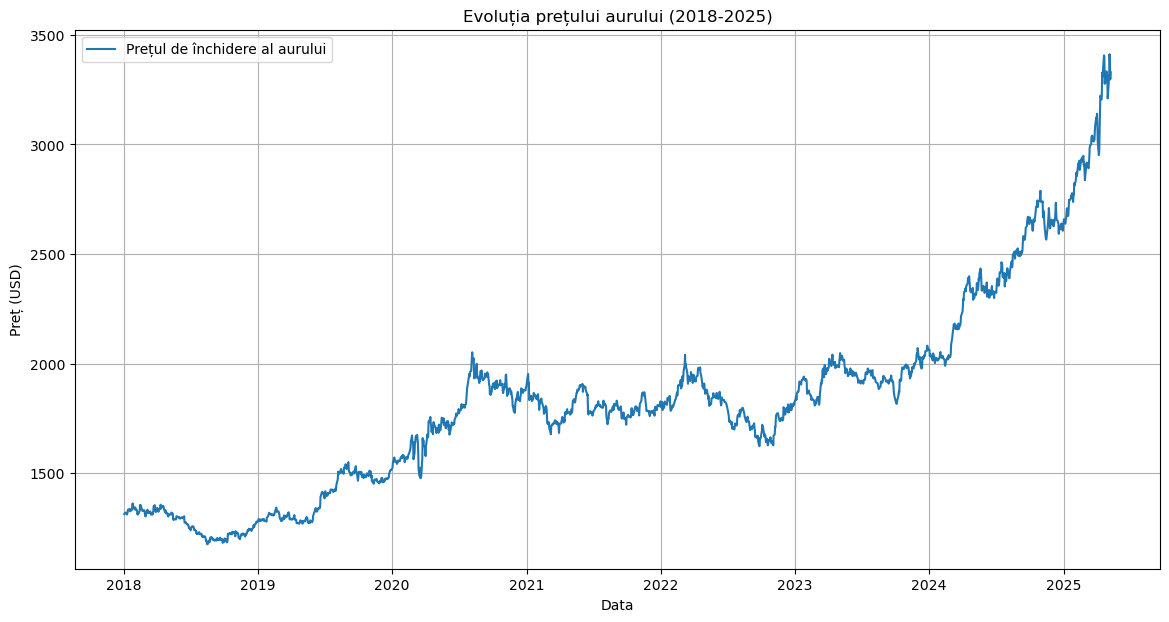

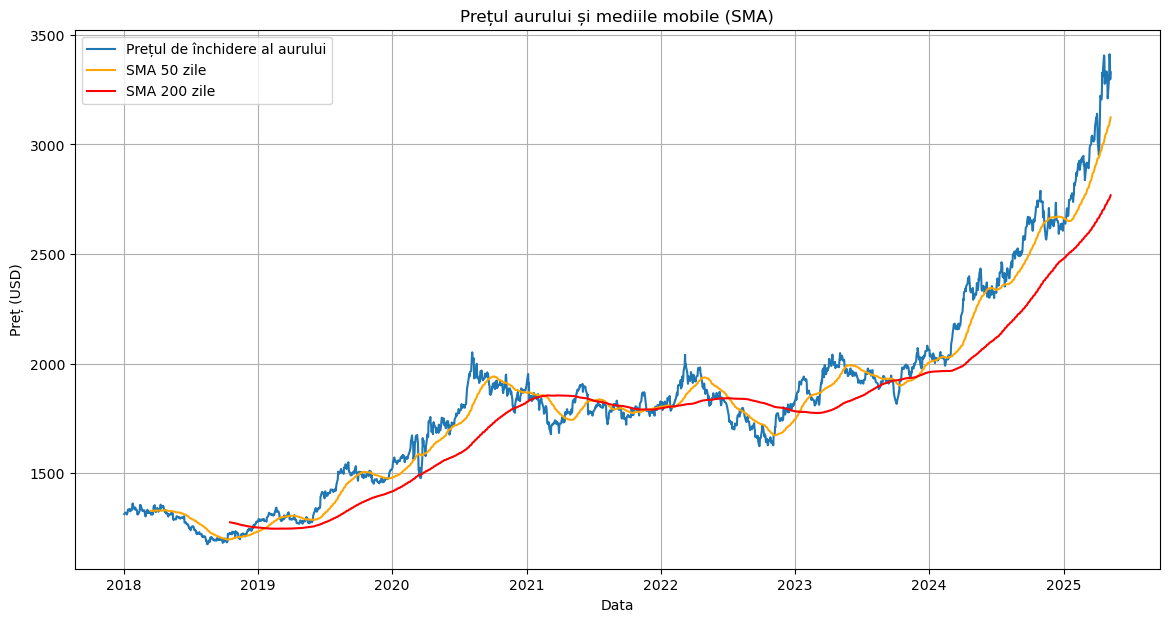

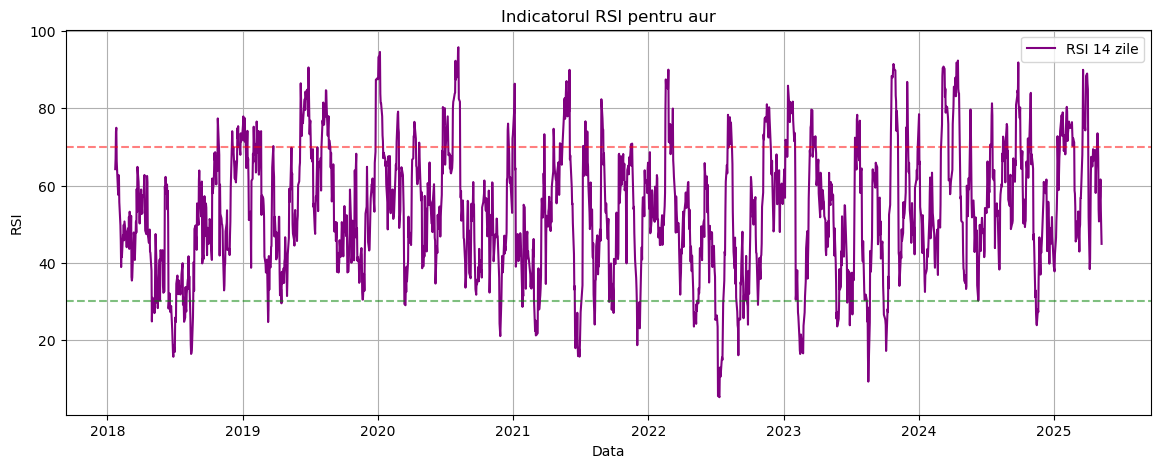

In [13]:
# Pasul 1: Instalarea bibliotecilor necesare (în cazul în care nu sunt instalate)
#!pip install yfinance matplotlib pandas

# Pasul 2: Importarea bibliotecilor necesare
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Pasul 3: Obținerea datelor istorice pentru aur (simbol: 'GC=F' pentru Gold Futures)
# Aici folosim intervalul de 5 ani de date istorice
gold_data = yf.download('GC=F', start='2018-01-01', end=dt.datetime.now())

# Pasul 4: Vizualizarea evoluției prețului aurului
plt.figure(figsize=(14,7))
plt.plot(gold_data['Close'], label='Prețul de închidere al aurului')
plt.title('Evoluția prețului aurului (2018-2025)')
plt.xlabel('Data')
plt.ylabel('Preț (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Pasul 5: Calcularea unei medii mobile simple (SMA) de 50 și 200 de zile
gold_data['SMA_50'] = gold_data['Close'].rolling(window=50).mean()
gold_data['SMA_200'] = gold_data['Close'].rolling(window=200).mean()

# Pasul 6: Vizualizarea graficului cu mediile mobile
plt.figure(figsize=(14,7))
plt.plot(gold_data['Close'], label='Prețul de închidere al aurului')
plt.plot(gold_data['SMA_50'], label='SMA 50 zile', color='orange')
plt.plot(gold_data['SMA_200'], label='SMA 200 zile', color='red')
plt.title('Prețul aurului și mediile mobile (SMA)')
plt.xlabel('Data')
plt.ylabel('Preț (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Pasul 7: Calcularea indicatorului RSI (Relative Strength Index)
def calculate_RSI(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

gold_data['RSI'] = calculate_RSI(gold_data['Close'])

# Pasul 8: Vizualizarea RSI
plt.figure(figsize=(14,5))
plt.plot(gold_data['RSI'], label='RSI 14 zile', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Indicatorul RSI pentru aur')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Import required libraries if not already imported
import datetime as dt
import yfinance as yf  # Using yfinance instead of pandas_datareader

# Define the symbol and date range
symbol = "GC=F"  # Gold Futures symbol
start = dt.datetime(2023, 1, 1)
end = dt.datetime.now()

# Use yfinance to download data
# yfinance is more reliable than pandas_datareader for Yahoo Finance data
df = yf.download(symbol, start=start, end=end)

print(df.tail(6))

# Note: If this still doesn't work, you might try:
# 1. Using a different symbol format like "GC" or "GLD" (SPDR Gold Shares ETF)
# 2. Installing the latest version of yfinance: pip install yfinance --upgrade
# 3. Adding a user-agent header if needed:
# import pandas_datareader as web
# import requests
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
# session = requests.Session()
# session.headers.update(headers)
# df = web.get_data_yahoo(symbol, start, end, session=session)

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open  Volume
Ticker             GC=F         GC=F         GC=F         GC=F    GC=F
Date                                                                  
2025-05-02  3231.899902  3257.000000  3225.000000  3239.899902    1349
2025-05-05  3311.300049  3315.699951  3239.699951  3242.699951     244
2025-05-06  3411.399902  3430.899902  3356.800049  3365.500000    2357
2025-05-07  3381.399902  3418.699951  3364.699951  3418.699951    1080
2025-05-08  3296.600098  3390.000000  3288.699951  3390.000000     200
2025-05-09  3329.100098  3352.699951  3278.899902  3310.199951  211207
